In [1]:
# Finger 6 - Stock exchange.ipynb
# Ignacio Giss

from numpy import *
# me importo la vida
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
from scipy.misc import imread
import matplotlib.cbook as cbook
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

# cargamos los datos y dates
stocks = loadtxt(open("stocks.csv","rb"),delimiter=",",skiprows=1, usecols=(range(1,25)))
dji = loadtxt(open("dji.csv","rb"),delimiter=",",skiprows=1, usecols=(0,))
dates = loadtxt(open("dji.csv","rb"),dtype='str_' ,delimiter=",",skiprows=1, usecols=(1,))

# obtenemos la descompición SVD
U,s,V = linalg.svd(stocks, full_matrices=True) # SVD decomposition of A





In [4]:
def graph(data, orig, dates):    
    datafile = cbook.get_sample_data("C:/Dev/Datos/finger/csnb/gbk.jpg")
    img = imread(datafile)
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())    
    plt.gcf().autofmt_xdate()
    
    # datos
    yData = array([y for y in data])  
    yData1 = [item-2 for sublist in yData for item in sublist][0]
    yData2 = [y for y in orig]    
    
    xData = [dt.datetime.strptime(d,"b'%Y-%m-%d'").date() for d in dates]

    
    
    fig, ax1 = plt.subplots()
    
    
    gax = plt.gca()
    gax.xaxis.grid(True)
    gax.grid(b=True, color='#dddddd')
    gax.set_axisbelow(True)
    
    # grafico 1, prediccion
    ax1.plot(xData, yData1, color='#FF6E13')
    ax1.set_xlabel('date (years)')
    
    
    x0,x1 = ax1.get_xlim()
    y0,y1 = ax1.get_ylim()
    ax1.imshow(img, extent=[x0, x1, y0, y1], aspect='auto')
    
    for tl in ax1.get_yticklabels():
        tl.set_color('#FF6E13')


    ax2 = ax1.twinx()
    
    
    # grafico 2, Dow Jones
    ax2.plot(xData, yData2, color='#50F078')
    
    for tl in ax2.get_yticklabels():
        tl.set_color('#50F078')
    
    # excesiva cantidad de lineas para hacer al gráfico más copado
    ax2.spines['bottom'].set_color('#dddddd')
    ax2.spines['left'].set_color('#FF6E13')
    ax2.spines['right'].set_color('#50F078')    
    ax2.tick_params(axis='x', colors='#dddddd')    
    ax2.yaxis.label.set_color('#FF6E13')
    ax2.xaxis.label.set_color('#dddddd')
    orng_patch = mpatches.Patch(color='#FF6E13', label='Predicción por SVD, k=1')
    green_patch = mpatches.Patch(color='#50F078', label='Dow Jones, datos reales')
    plt.legend(handles=[orng_patch, green_patch])
    
    fig2 = matplotlib.pyplot.gcf()
    fig2.set_size_inches(15.0, 8.0)
    fig2.savefig('test2png.png', dpi=100)

    # ahora si
    plt.show()
    
    

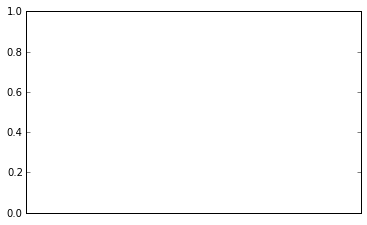

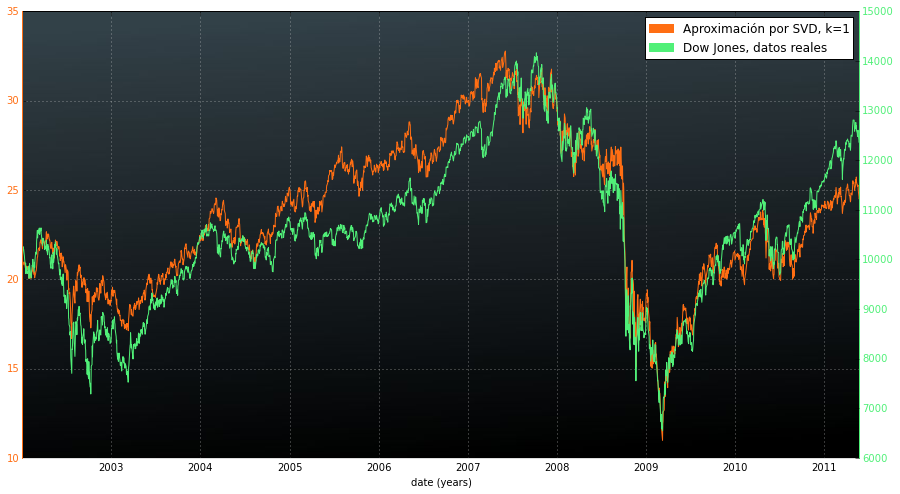

In [5]:
# la parte más complicada del ejercicio
S = zeros((2366, 24))
S[:24, :24] = diag(s)

# k=1
V2 = matrix(V[:,0])
U2 = matrix(U[:,0])
U2 = U2.T

Ak = dot(U2, dot(S[0,0], V2))

Ak[:,0]

graph(Ak[:,0].T, dji, dates)
# grafico en blanco... para generar suspenso


In [ ]:
#
# La predicción de la variación en el índice Dow Jones se realizo en base a los valores
# de  25 acciones que no pertenecen al índice (ADC,AFL,ARKR,AZPN,CLFD,DTE,ENDP,
#  FLWS,FR,GMXR,GPC,HE,ISSC,ISSI,KSS,MTSC,NWN,ODFL,PARL,RELV,SIGM,STT,TRIB,UTR), 
# y sin embargo se ve que se ajusta muy bien a los valores reales del DJ.
#
# El índice Dow Jones toma el precio de las acciones de las 30 compañías industriales
# más importantes y representativas de Estados Unidos. Parece que el hecho de que sean
# 30 acciones tiene que ver con que es un valor que alcanza para predecir como evoluciona 
# el mercado de acciones, ya que con 25 acciones ya se pueden obtener resultados bastante buenos. 
#
# Mirando un poco el tipo de acciones que se muestran en el archivo de stocks encontramos:
# Hawaiian Electric Industries Inc. , Agree Realty Corp., MTS Systems Corporation,
# Old Dominion Freight Line, Inc., Reliv International, State Street Corporation, 
# Inc, Kemper Corporation, entre otras. Algunas son bastante grandes como la financiera 
# State Street Corporation con ingresos de USD 9.878 billones, o la aseguradora 
# Kemper Corporation con USD 8 billones en activos.
# Pero comparadas con las empresas que miden en DJ 
# (Coca-Cola, Google, Exxon, Intel, IBM, P&G, Microsoft, entre otras) resultan 
# de mucho menor tamaño.
#
# Viendo la descripción de alguna de esas empresas :
# "Old Dominion Freight Line, Inc.is a less-than-truckload, union-free motor 
# carrier providing regional" "Less than truckload shipping (LTL) is the 
#  transportation of relatively small freight"
# "Reliv International, Inc. or Reliv, is a dietary supplement and skin-care company"
#  O sea que estamos comparando las acciones de empresas de transporte de pequeñas cargas
#  y de suplementos dietarios y al reducirlas obtenemos buenas aproximaciones para las 
#   empresas más grandes. 
#  Teniendo eso en cuenta me parece que SVD resulta extremadamente muy buena para comparar
#  la evolución de unas cuantas acciones (que no son las más significativas) con la de los 
#  mercados más grandes.
#  PD: Pude haber puesto cualquier cosa porque entiendo poco y nada de la Bolsa de valores.
# 